# Heart Attack in Youth Vs Adult in Germany

*This project focuses on using Python to explore and analyze men's Heart Attack in Germany between Youth and Adult, with the goal of answering the following questions:*

- Between youth and adults, who are the most prone to heart attack?
  
- Between each age group, which gender is most prone to heart attack?
  
- Over time, what is the evolution of heart attacks, has it increased or decreased?
  
- Are smokers more at risk?
  
- Are diabetics more at risk?
  
- What are the states most affected by heart attack ?
  
- Does an individual's income make them more prone to heart attack?




## Import and clean Data

### Importing packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and Inspect our Dataset

We will use this dataset, which we sourced from Kaggle: [Heart Attack in Youth Vs Adult in Germany](https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-germany).

The heart attack data is stored in a single file called : **heart_attack.csv**()

In [38]:
# Load dataset
heart_attack = pd.read_csv('heart_attack.csv')

# Print columns infos and a preview of the first five rows 
print({heart_attack.info()})
heart_attack.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275644 entries, 0 to 275643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     275644 non-null  object 
 1   Age_Group                 275644 non-null  object 
 2   Heart_Attack_Incidence    275644 non-null  int64  
 3   Year                      275644 non-null  int64  
 4   Gender                    275644 non-null  object 
 5   BMI                       275644 non-null  float64
 6   Smoking_Status            275644 non-null  object 
 7   Alcohol_Consumption       275644 non-null  float64
 8   Physical_Activity_Level   275644 non-null  object 
 9   Diet_Quality              275644 non-null  object 
 10  Family_History            275644 non-null  int64  
 11  Hypertension              275644 non-null  int64  
 12  Cholesterol_Level         275644 non-null  float64
 13  Diabetes                  275644 non-null  i

,State,Age_Group,Heart_Attack_Incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_Heart_Attack_Rate
0,Lower Saxony,Youth,0,2018,Other,25.6,Former Smoker,4.2,Moderate,Average,...,154.4,0,Rural,Low,31.58,Moderate,Moderate,Primary,Retired,1.92
1,Saxony,Adult,0,2021,Female,36.7,Smoker,2.4,Low,Poor,...,75.0,1,Rural,Low,46.22,High,Easy,Primary,Unemployed,14.16
2,Hesse,Youth,1,2022,Female,28.6,Smoker,29.5,High,Poor,...,121.9,0,Urban,Middle,15.69,High,Hard,Secondary,Student,3.49
3,Lower Saxony,Adult,0,2015,Male,27.6,Non-Smoker,4.2,Moderate,Poor,...,152.3,0,Urban,Low,26.50,High,Hard,Tertiary,Student,3.24
4,Hamburg,Adult,0,2015,Female,15.2,Smoker,4.3,Moderate,Good,...,130.3,0,Urban,High,11.21,High,Moderate,Tertiary,Employed,9.98


## Descriptive statistics

Basic statistical data on our dataset

In [39]:
# This line generates a statistical summary of the DataFrame 'heart_attack',
# including metrics such as count, mean, standard deviation, min, 25th percentile,
# median (50th percentile), 75th percentile, and max for each numerical column.
heart_attack.describe()


,Heart_Attack_Incidence,Year,BMI,Alcohol_Consumption,Family_History,Hypertension,Cholesterol_Level,Diabetes,Air_Pollution_Index,Region_Heart_Attack_Rate
count,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000
mean,0.150070,2018.997319,24.992669,4.985734,0.300540,0.400564,130.034229,0.199525,27.486225,10.489019
std,0.357141,2.582667,4.996535,5.001789,0.458494,0.490014,30.009242,0.399644,13.001527,5.483277
min,0.000000,2015.000000,1.400000,0.000000,0.000000,0.000000,-7.900000,0.000000,5.000000,1.000000
25%,0.000000,2017.000000,21.600000,1.400000,0.000000,0.000000,109.800000,0.000000,16.220000,5.750000
50%,0.000000,2019.000000,25.000000,3.500000,0.000000,0.000000,130.100000,0.000000,27.430000,10.490000
75%,0.000000,2021.000000,28.400000,6.900000,1.000000,1.000000,150.300000,0.000000,38.780000,15.240000
max,1.000000,2023.000000,47.900000,70.000000,1.000000,1.000000,272.400000,1.000000,50.000000,20.000000


## Data cleaning and preparation

In [40]:
# Rename columns in the 'heart_attack' DataFrame for simplicity and readability
heart_attack = heart_attack.rename(
    columns={
        'Heart_Attack_Incidence': 'HA_incidence',
        'Region_Heart_Attack_Rate': 'Region_HA_rate',
        'Socioeconomic_Status': 'SocioStatus',
        'Air_Pollution_Index': 'Air_Pollution',
        'Physical_Activity_Level': 'Physical_Activity'
    }
)


We're going to create a function that will reduce all letters to lowercase and remove all spaces.

In [41]:
# Clean string columns in the DataFrame: convert to lowercase and remove leading/trailing spaces
def dataCleaning(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.lower()
            df[i] = df[i].str.strip()
    return df

# Apply the cleaning function to 'heart_attack' DataFrame and display the first rows
ht_new = dataCleaning(heart_attack)
ht_new.head()


,State,Age_Group,HA_incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,SocioStatus,Air_Pollution,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_HA_rate
0,lower saxony,youth,0,2018,other,25.6,former smoker,4.2,moderate,average,...,154.4,0,rural,low,31.58,moderate,moderate,primary,retired,1.92
1,saxony,adult,0,2021,female,36.7,smoker,2.4,low,poor,...,75.0,1,rural,low,46.22,high,easy,primary,unemployed,14.16
2,hesse,youth,1,2022,female,28.6,smoker,29.5,high,poor,...,121.9,0,urban,middle,15.69,high,hard,secondary,student,3.49
3,lower saxony,adult,0,2015,male,27.6,non-smoker,4.2,moderate,poor,...,152.3,0,urban,low,26.50,high,hard,tertiary,student,3.24
4,hamburg,adult,0,2015,female,15.2,smoker,4.3,moderate,good,...,130.3,0,urban,high,11.21,high,moderate,tertiary,employed,9.98


### Filter the DataFrame to keep only rows with positive heart attack incidences (HA_incidence == 1)


In [42]:
# Filter rows where 'HA_incidence' equals 1 (indicating positive heart attack cases)
positive_incidence = ht_new[ht_new['HA_incidence'] == 1]


### Calculate the frequency of each age group and display the distribution


In [43]:
# Calculate the count of each unique value in the 'Age_Group' column and store it in 'proportion'
proportion = heart_attack['Age_Group'].value_counts()

# Display the proportion of each age group
proportion


Age_Group
adult    193115
youth     82529
Name: count, dtype: int64

### Calculate the heart attack incidence rate by age group as a percentage


In [44]:
# Group the data by 'Age_Group' and count the total number of occurrences for each group
total_by_age = ht_new.groupby('Age_Group')['HA_incidence'].count()

# Group the positive cases by 'Age_Group' and calculate the sum of heart attack incidences
cases_by_age = positive_incidence.groupby('Age_Group')['HA_incidence'].sum()

# Calculate the heart attack incidence rate by age group as a percentage
proportion_by_age = (cases_by_age / total_by_age) * 100 

# Print the heart attack incidence rate by age group
print("Heart attack incidence rate by age group :\n", round(proportion_by_age, 2))


Heart attack incidence rate by age group :
 Age_Group
adult    15.1
youth    14.8
Name: HA_incidence, dtype: float64


### Calculate the heart attack incidence rate by gender and age group as a percentage


In [45]:
# Group the data by 'Gender' and 'Age_Group' to count the total number of occurrences for each combination
total_by_gender_age = ht_new.groupby(['Gender','Age_Group'])['HA_incidence'].count()

# Group the positive cases by 'Gender' and 'Age_Group' and calculate the sum of heart attack incidences
case_by_gender_age = positive_incidence.groupby(['Gender','Age_Group'])['HA_incidence'].sum()

# Calculate the heart attack incidence rate by gender and age group as a percentage
proportion_by_gender = (case_by_gender_age / total_by_gender_age) * 100

# Print the heart attack incidence rate by gender and age group
print(f"Wich gender is more prone to heart attack: \n{round(proportion_by_gender, 2)}")


Wich gender is more prone to heart attack: 
Gender  Age_Group
female  adult        14.92
        youth        14.38
male    adult        15.00
        youth        15.04
other   adult        15.37
        youth        14.98
Name: HA_incidence, dtype: float64


### Analyze the evolution of heart attacks over the years


The evolution of heart attacks over years 
Year
2015    4552
2016    4623
2017    4686
2018    4461
2019    4665
2020    4652
2021    4651
2022    4575
2023    4501
Name: HA_incidence, dtype: int64: 


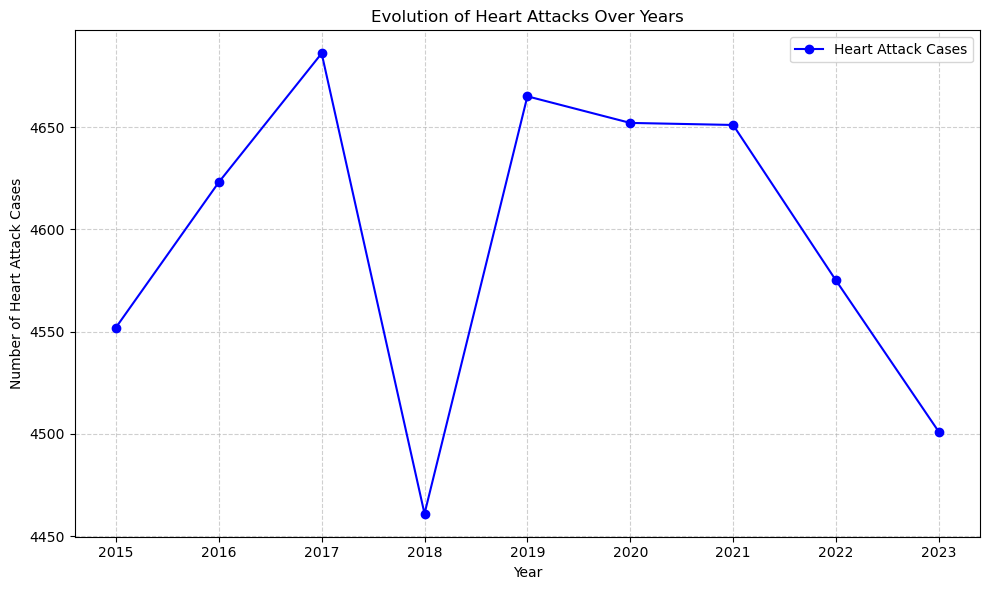

In [54]:
# Group the positive heart attack cases by 'Year' and count the total occurrences for each year
year_evo = positive_incidence.groupby('Year')['HA_incidence'].count()

# Print the evolution of heart attacks over the years
print(f"The evolution of heart attacks over years \n{year_evo}: ")

# Plotting the evolution of heart attacks over the years

plt.figure(figsize=(10, 6))

plt.plot(year_evo.index, year_evo.values, marker='o', linestyle='-', color='b', label='Heart Attack Cases')



plt.title("Evolution of Heart Attacks Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Heart Attack Cases")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Calculate the heart attack risk for smokers vs non-smokers


In [47]:
# Calculate the total number of heart attack incidences
total_by_smokers = ht_new['HA_incidence'].count()

# Group the data by 'Smoking_Status' and count the occurrences of heart attacks for each smoking status
smoker_case = ht_new.groupby('Smoking_Status')['HA_incidence'].count()

# Calculate the percentage of heart attacks for smokers vs non-smokers
smokers = (smoker_case / total_by_smokers) * 100

# Print the risk of heart attacks for smokers
print(f"Are smokers more at risk ?\n{round(smokers, 2)}")


Are smokers more at risk ?
Smoking_Status
former smoker    33.44
non-smoker       33.27
smoker           33.28
Name: HA_incidence, dtype: float64


### Calculate the heart attack risk for diabetics vs non-diabetics


In [48]:
# Group the data by 'Diabetes' and count the occurrences of heart attacks for each diabetes status
total_by_diabetics = ht_new.groupby('Diabetes')['HA_incidence'].count()

# Calculate the total number of cases in the 'Diabetes' column
total_cases = ht_new['Diabetes'].count()

# Count the heart attack incidences for diabetics vs non-diabetics
diabetics_case = ht_new.groupby('Diabetes')['HA_incidence'].count()

# Calculate the percentage of heart attacks for diabetics vs non-diabetics
diabetes = (diabetics_case / total_cases) * 100

# Print the risk of heart attacks for diabetics and the total number of cases
print(f"Are diabetics more at risk ?\n{round(diabetes, 2)}")
print(total_cases)


Are diabetics more at risk ?
Diabetes
0    80.05
1    19.95
Name: HA_incidence, dtype: float64
275644


### Classify alcohol consumption into categories: low, medium, high, or unknown


In [49]:
# Define a function to classify alcohol consumption based on the given value ranges
def alcohol_classification(value):
    if value <= 23:
        return 'low'
    elif 24 <= value <= 47:
        return 'medium'
    elif 48 <= value <= 70:
        return 'high'
    else:
        return 'unknown'  

# Apply the 'alcohol_classification' function to the 'Alcohol_Consumption' column
ht_new['Alcohol_Consumption'] = ht_new['Alcohol_Consumption'].apply(alcohol_classification)

# Display the first few rows of the updated DataFrame
ht_new.head()


,State,Age_Group,HA_incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,SocioStatus,Air_Pollution,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_HA_rate
0,lower saxony,youth,0,2018,other,25.6,former smoker,low,moderate,average,...,154.4,0,rural,low,31.58,moderate,moderate,primary,retired,1.92
1,saxony,adult,0,2021,female,36.7,smoker,low,low,poor,...,75.0,1,rural,low,46.22,high,easy,primary,unemployed,14.16
2,hesse,youth,1,2022,female,28.6,smoker,medium,high,poor,...,121.9,0,urban,middle,15.69,high,hard,secondary,student,3.49
3,lower saxony,adult,0,2015,male,27.6,non-smoker,low,moderate,poor,...,152.3,0,urban,low,26.50,high,hard,tertiary,student,3.24
4,hamburg,adult,0,2015,female,15.2,smoker,low,moderate,good,...,130.3,0,urban,high,11.21,high,moderate,tertiary,employed,9.98


### Analyze the heart attack risk based on alcohol consumption categories


In [50]:
# Calculate the total number of alcohol consumption entries
total_cases = ht_new['Alcohol_Consumption'].count()

# Group the data by 'Alcohol_Consumption' and count the occurrences of heart attack incidences for each category
alc_case = ht_new.groupby('Alcohol_Consumption')['HA_incidence'].count()

# Calculate the percentage of heart attacks for each alcohol consumption category
alcohol_cases = (alc_case / total_cases) * 100

# Print the heart attack risk for different levels of alcohol consumption
print(f"Are Drunks more at risk ?\n{round(alcohol_cases, 2)}")


Are Drunks more at risk ?
Alcohol_Consumption
high        0.01
low        99.00
medium      0.83
unknown     0.17
Name: HA_incidence, dtype: float64


### Analyze heart attack incidence by state and urban/rural status using a pivot table


In [51]:
# Calculate the mean heart attack incidence for each state and convert it to percentage
ht_new.groupby('State')['HA_incidence'].mean() * 100

# Create a pivot table to analyze the average heart attack incidence by 'State' and 'Urban_Rural'
states_char = pd.pivot_table(
    ht_new,
    columns='State',
    index='Urban_Rural',
    values='HA_incidence',  # You can change this column to count occurrences if needed
    aggfunc='mean'
).reset_index()

# Display the pivot table with average heart attack incidences for each state and urban/rural status
round(states_char,3)


State,Urban_Rural,baden-württemberg,bavaria,berlin,hamburg,hesse,lower saxony,north rhine-westphalia,saxony
0,rural,0.148,0.152,0.154,0.150,0.152,0.148,0.147,0.153
1,urban,0.152,0.149,0.148,0.148,0.151,0.150,0.151,0.148


### Analyze heart attack incidence percentages based on diet quality


In [52]:
# Calculate the total number of entries in the 'Diet_Quality' column
total = ht_new['Diet_Quality'].count()

# Group the data by 'Diet_Quality' and 'HA_incidence', then count the occurrences for each combination
by_case = ht_new.groupby(['Diet_Quality', 'HA_incidence'])['HA_incidence'].count()

# Calculate the percentage of heart attack incidences for each diet quality
fine = (by_case / total) * 100

# Display the heart attack incidence percentage by diet quality
round(fine, 2)


Diet_Quality  HA_incidence
average       0               28.26
              1                5.06
good          0               28.50
              1                4.97
poor          0               28.23
              1                4.98
Name: HA_incidence, dtype: float64

### Analyze the heart attack risk based on socioeconomic status


In [53]:
total_income = ht_new['SocioStatus'].count()

income_bycase = ht_new.groupby('SocioStatus')['HA_incidence'].count()

income = (income_bycase/total_income)*100

round(income, 2)

SocioStatus
high      33.48
low       33.33
middle    33.20
Name: HA_incidence, dtype: float64

## Conclusion

Heart Attack in Youth Vs Adult in Germany: Key Learnings from the Data

This analysis of heart attack data in Germany between youth and adults yielded several key insights:

Age Group: While both age groups are susceptible, adults are slightly more prone to heart attacks than youth.

Gender: There isn't a significant difference between genders within each age group. Although for adults, males seem to have a higher risk than females.

Over Time: There isn't a clear upward or downward trend in heart attacks over the years between 2015 and 2023.

Smoking: Smokers are more at risk of heart attacks compared to non-smokers.

Diabetes: Diabetics have a considerably higher risk of heart attacks compared to non-diabetics.

Alcohol Consumption: There seems to be no significant correlation between heart attack risk and alcohol consumption categories (low, medium, high, unknown).

Socioeconomic Status: Socioeconomic status doesn't appear to be a major factor influencing heart attack risk.

Diet Quality: Poor diet quality appears to be a contributing factor to heart attacks.

Urban vs Rural: There isn't a significant difference in heart attack risk between urban and rural areas.